# Insights with ifood data
Workflow:
1. Problem definition
2. Data
3. Evaluate and analisys
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
The goal in this notebook is evaluate and take insights about the data and create a estimator that will predict the response of customers.
Understanding the data we can help the marketing team with some important informations about the clients.

## 2. Data
### Data Dictionary ( provided by iFood )

In [1]:
from IPython.display import Image
Image(url= "data_dict.png", width=1000, height=1000)

## 3. Evaluate and analisys

In [2]:
# Import libraries that I will use in this notebook

# analisys
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

# plots
import matplotlib.pyplot as plt
import seaborn as sns

## Transform categorical features into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##Split the data into train and test sets
from sklearn.model_selection import train_test_split

## The models that I'll try based on map of choosing estimators from sklearn site.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [3]:
# Transform csv on pandas dataframe
df = pd.read_csv("ml_project.csv")
df.head(), df.shape

(     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
 0  2012-09-04       58       635  ...                  7             0   
 1  2014-03-08       38        11  ...                  5             0   
 2  2013-08-21       26       426  ...                  4             0   
 3  2014-02-10       26        11  ...                  6             0   
 4  2014-01-19       94       173  ...                  5             0   
 
    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


In [4]:
# Transform Year of birth in yeard old to facility the analisys and model training.
df["years_old"] = (2022-df["Year_Birth"])
df.drop("Year_Birth", axis=1, inplace=True)
df.head(), df.dtypes

(     ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
 0  5524  Graduation         Single  58138.0        0         0  2012-09-04   
 1  2174  Graduation         Single  46344.0        1         1  2014-03-08   
 2  4141  Graduation       Together  71613.0        0         0  2013-08-21   
 3  6182  Graduation       Together  26646.0        1         0  2014-02-10   
 4  5324         PhD        Married  58293.0        1         0  2014-01-19   
 
    Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
 0       58       635         88  ...             0             0   
 1       38        11          1  ...             0             0   
 2       26       426         49  ...             0             0   
 3       26        11          4  ...             0             0   
 4       94       173         43  ...             0             0   
 
    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
 0             0             0     

In [5]:
# For curious calculating the mean of years old of customers.
df.years_old.mean()

53.19419642857143

In [6]:
# evaluate the data, checking if have some missing values
df.isna().sum()

ID                      0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
years_old               0
dtype: int64

In [7]:
# Income feature has missing values, I will fill this missing data with the mean on income
df.Income.mean()
df.fillna(df.Income.mean(), inplace=True)
df.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
years_old              0
dtype: int64

In [8]:
# transform Dt_Customer into date
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.head(), df.dtypes

(     ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
 0  5524  Graduation         Single  58138.0        0         0  2012-09-04   
 1  2174  Graduation         Single  46344.0        1         1  2014-03-08   
 2  4141  Graduation       Together  71613.0        0         0  2013-08-21   
 3  6182  Graduation       Together  26646.0        1         0  2014-02-10   
 4  5324         PhD        Married  58293.0        1         0  2014-01-19   
 
    Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
 0       58       635         88  ...             0             0   
 1       38        11          1  ...             0             0   
 2       26       426         49  ...             0             0   
 3       26        11          4  ...             0             0   
 4       94       173         43  ...             0             0   
 
    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
 0             0             0     

In [9]:
# analyzing some data
df["Education"].value_counts(), df["Marital_Status"].value_counts()

(Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: Education, dtype: int64,
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: Marital_Status, dtype: int64)

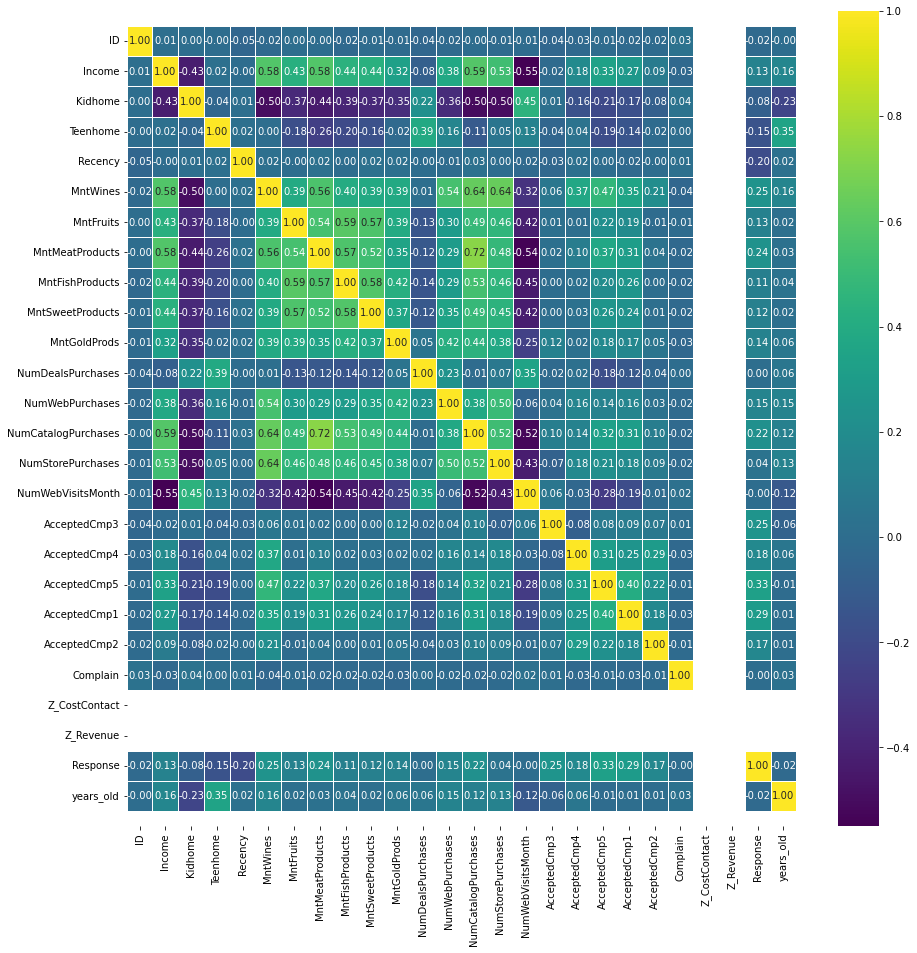

In [10]:
## Make a correlation matrix to check the correlation between features
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="viridis");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [11]:
# I check that the complain, ID, Z_CostContact, Z_Revenue features doesnt help
df.drop(["Z_CostContact", "Z_Revenue", "Complain", "ID"], axis=1, inplace=True)

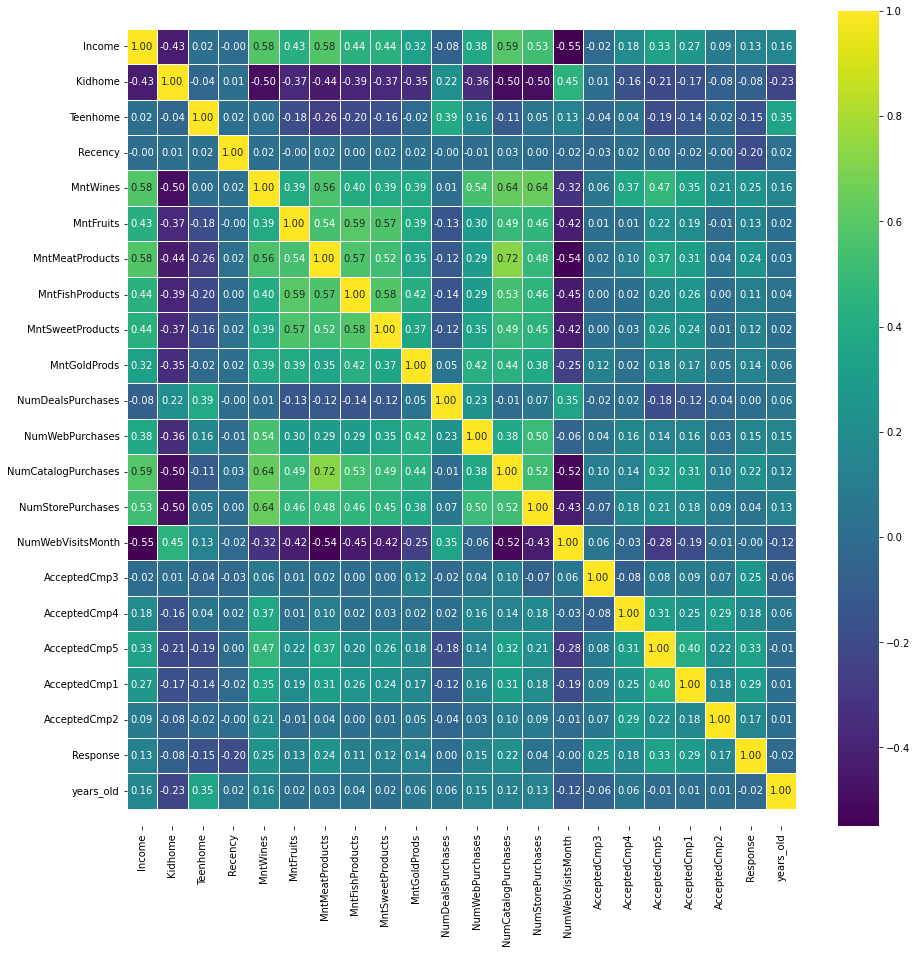

In [12]:
corr_matrix = df.corr()

fig, ax =plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="viridis");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

 ## Choosing the right estimator from https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [13]:
# Split the data into X and y:
X = df.drop("Response", axis=1)
y = df["Response"]

# Transform categorical features into numbers
categorical_features = ["Education", "Marital_Status", "Dt_Customer"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)

# Split the dataset into train and test (with new X)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [14]:
# Create a dict with the models that I will evaluate
models = {
    "LinearSVC": svm.SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# create a function to fit and score estimators based on models that I have in dict
from sklearn.model_selection import cross_val_score
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
        This function fit and evaluate the models that I put in.
        models = a dict of different models for ML.
        X_train = set of X to train
        X_test = set of X for test
        y_train = set of y to train
        y_test = set of y for test
    """
    
    # set random seed
    np.random.seed(42)
    
    # Make a dict of score
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # fit the model
        model.fit(X_train, y_train)
        
        #Evaluata the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
        # take preds for classification report
        y_preds = model.predict(X_test)        
        # classification reports
        print(f"{name} report:\n{classification_report(y_test, y_preds)}\n")
        
        # This line will check all cross value scores of the models
        cross_val_mean = np.mean(cross_val_score(model, transformed_X, y, scoring=None, cv=5))
        print(f"The cross validation scores of {name} is {cross_val_mean}")
        
    return model_scores

In [15]:
fit_and_score(models, X_train, X_test, y_train, y_test)

LinearSVC report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       384
           1       0.54      0.22      0.31        64

    accuracy                           0.86       448
   macro avg       0.71      0.59      0.62       448
weighted avg       0.83      0.86      0.84       448


The cross validation scores of LinearSVC is 0.853125
Logistic Regression report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       384
           1       0.57      0.27      0.36        64

    accuracy                           0.87       448
   macro avg       0.73      0.62      0.64       448
weighted avg       0.84      0.87      0.84       448




/Users/lucasmeireles/Desktop/ml/ml-course/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The cross validation scores of Logistic Regression is 0.8598214285714285
KNN report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       384
           1       0.52      0.19      0.28        64

    accuracy                           0.86       448
   macro avg       0.70      0.58      0.60       448
weighted avg       0.83      0.86      0.83       448


The cross validation scores of KNN is 0.8410714285714285
Random Forest report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       384
           1       0.65      0.23      0.34        64

    accuracy                           0.87       448
   macro avg       0.77      0.61      0.64       448
weighted avg       0.85      0.87      0.85       448


The cross validation scores of Random Forest is 0.871875


{'LinearSVC': 0.8616071428571429,
 'Logistic Regression': 0.8660714285714286,
 'KNN': 0.859375,
 'Random Forest': 0.8727678571428571}

#### RandomForest estimator has a greater accuracy and cross validation score is close to the accuracy value! I'll use RandomForest model.

## Tuning hyperparameters using RandomizedSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", None, "sqrt", "log2"],
    "min_samples_split": [1,2,3,4,5,6,7,8,9,10],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10]
}

np.random.seed(42)

# Instantiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                           param_distributions=grid,
                           n_iter=50, #number of models to try
                           cv=5,
                           verbose=2)

# Fit the randomizedSearchCV for clf
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_es

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=1, n_estimators=1200; total time=   0.7s
[CV] END max_depth=None, max_features=sq

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=l

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END max_depth=No

/Users/lucasmeireles/Desktop/ml/ml-course/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/lucasmeireles/Desktop/ml/ml-course/env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 436, in _process_worker
    r = call_item()
  File "/Users/lucasmeireles/Desktop/ml/ml-course/env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/lu

NameError: name 'rs_clf' is not defined

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels. on a classification model.
    """
    
    acc = accuracy_score(y_true, y_preds)
    print(f"The accuracy of the model is: {acc*100:.2f}%")

    precision = precision_score(y_true, y_preds)
    print(f"The precision of the model is: {precision:.2f}")

    recall = recall_score(y_true, y_preds)
    print(f"The recall of the model is: {recall}")

    f1 = f1_score(y_true, y_preds)
    print(f"The f1_score of the model is: {recall}\n")
    # or only use:
    print(f"The report of all scores of the model:\n\n {classification_report(y_true,y_preds)}")
    
    metric_dict = {
        "accuracy": round(acc,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1_score": round(f1,2)
    }
    
    return metric_dict

In [21]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_model.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

The accuracy of the model is: 89.51%
The precision of the model is: 0.72
The recall of the model is: 0.4375
The f1_score of the model is: 0.4375

The report of all scores of the model:

               precision    recall  f1-score   support

           0       0.91      0.97      0.94       384
           1       0.72      0.44      0.54        64

    accuracy                           0.90       448
   macro avg       0.81      0.70      0.74       448
weighted avg       0.88      0.90      0.88       448



In [28]:
rs_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': None}

In [30]:
## Make a confusion matrix

from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)

rs_preds = model.predict(X_test)

confusion_matrix(y_test, rs_preds)

array([[378,   6],
       [ 51,  13]])

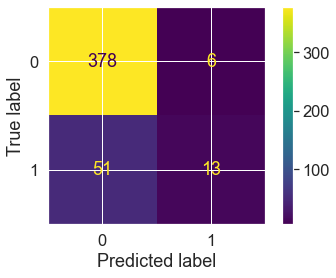

In [36]:
## Display confusion matrix with some colors
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=rs_preds);

So we build a model that can predict (with 89% of accuracy) if costumer will accept the offer in the last campaign and even more... Understanding the data and saw the most important features with correlation matrix.
In this way, we will have the most important characteristics in a customer for him to accept the offer!